## Imports

In [21]:
import torch
import torch.nn as nn
import scipy.stats as stats
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchviz import make_dot
from torch import optim
import matplotlib.pyplot as plt



from icnnet import ICNNet
from mydataset import MyDataset
import toy_data_dataloader_gaussian

In [3]:
%load_ext autoreload
%autoreload 2

## Toy data


In [19]:
dataloader, locs, scales = toy_data_dataloader_gaussian.get_dataloader(N = 500, batch_size = 100, r = 100)

## Training

### PICNN training

In [16]:
epochs = 100

# Initialize the model
model = ICNNet(input_size=2, layer_sizes = [2,4,2], context_layer_sizes=[2,2,2])
model.train()

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

for epoch in range(epochs):
    for x_batch, c_batch, y_batch in dataloader:
        x_batch.requires_grad_(True)
        c_batch.requires_grad_(True)

        optimizer.zero_grad() # Zero the gradients
        
        output = model(x_batch, c_batch)  # Assuming context c is same as input x

        loss = criterion(output, y_batch) # Compute the loss
        loss.backward() # Backward pass

        optimizer.step() # Update the parameters
        for layers_k in model.layers_z:
            for param in layers_k.parameters():
                param.data.clamp_min_(0)
        
        #pass

    #for name, parameter in model.named_parameters():
        #if parameter.requires_grad and parameter.grad is not None:
            #grad_norm = parameter.grad.norm().item()
            #print(f"Gradient norm for {name}: {grad_norm}")

    print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item()}")




Epoch 1/100 Loss: 299.1531982421875
Epoch 2/100 Loss: 184.2635955810547
Epoch 3/100 Loss: 93.85877227783203
Epoch 4/100 Loss: 82.62894439697266
Epoch 5/100 Loss: 64.47706604003906
Epoch 6/100 Loss: 51.23030471801758
Epoch 7/100 Loss: 46.80332946777344
Epoch 8/100 Loss: 46.937984466552734
Epoch 9/100 Loss: 46.25998306274414
Epoch 10/100 Loss: 34.970394134521484
Epoch 11/100 Loss: 34.74873352050781
Epoch 12/100 Loss: 34.7386360168457
Epoch 13/100 Loss: 36.517333984375
Epoch 14/100 Loss: 35.75251007080078
Epoch 15/100 Loss: 32.62629318237305
Epoch 16/100 Loss: 32.42580032348633
Epoch 17/100 Loss: 26.9827880859375
Epoch 18/100 Loss: 28.27971649169922
Epoch 19/100 Loss: 27.57278060913086
Epoch 20/100 Loss: 30.714675903320312
Epoch 21/100 Loss: 28.36863136291504
Epoch 22/100 Loss: 27.110883712768555
Epoch 23/100 Loss: 28.64873695373535
Epoch 24/100 Loss: 30.024824142456055
Epoch 25/100 Loss: 28.43329429626465
Epoch 26/100 Loss: 27.646469116210938
Epoch 27/100 Loss: 26.607969284057617
Epoch 2

In [17]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Suppose 'model' is your PyTorch model
num_parameters = count_parameters(model)

print(f'The model has {num_parameters} parameters')

The model has 88 parameters


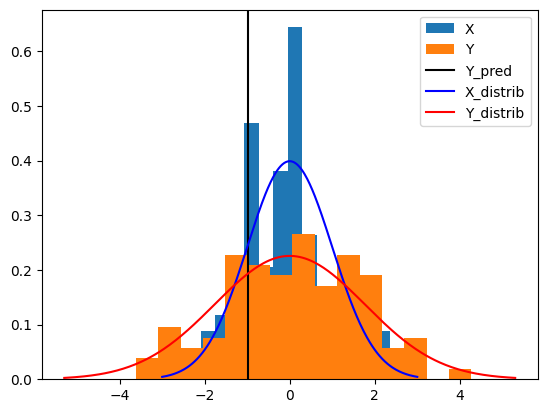

In [18]:
X = dataloader.dataset.X
Y = dataloader.dataset.Y
C = dataloader.dataset.C


Y_pred  = model(X, C)[0, :, 0].detach().numpy().mean()

plt.hist(X[0, :, 0],  bins=15, label = 'X', density = True)
plt.hist(Y[0, :, 0],  bins=15, label = 'Y', density = True)
plt.axvline(x = Y_pred, color = 'black', label = 'Y_pred')
plt.plot(np.linspace(-3, 3, 300), stats.norm.pdf(np.linspace(-3, 3, 300), loc=0, scale=1), label = 'X_distrib', color = 'blue')
plt.plot(np.linspace(-3*scales[0, 0] + locs[0, 0], 3*scales[0, 0] + locs[0, 0], 300), stats.norm.pdf(np.linspace(-3*scales[0, 0] + locs[0, 0], 3*scales[0, 0] + locs[0, 0], 300), loc=locs[0, 0], scale=scales[0, 0]), label = 'Y_distrib', color = 'red')

plt.legend()

plt.show()
         





In [37]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for x_batch, c_batch, y_batch in dataloader:
        outputs = model(x_batch, c_batch)
        for result, y in zip(outputs, y_batch) :
            print(result, y)
        break



tensor([[4.5600, 4.3918],
        [4.7705, 4.7004],
        [4.6946, 4.6554],
        [4.5382, 4.4229],
        [4.5906, 4.4923],
        [4.5877, 4.4887],
        [4.6031, 4.4472],
        [4.5845, 4.4671],
        [4.4583, 4.4210],
        [4.5895, 4.4790],
        [4.4909, 4.4088],
        [4.6771, 4.5779],
        [4.7737, 4.8271],
        [4.5441, 4.4553],
        [4.5348, 4.4322],
        [4.4943, 4.4187],
        [4.5592, 4.4095],
        [4.5370, 4.3898],
        [4.5848, 4.6059],
        [4.5997, 4.5953],
        [4.5449, 4.4185],
        [4.5127, 4.4492],
        [4.5995, 4.4973],
        [4.5079, 4.4309],
        [4.5259, 4.3931],
        [4.5083, 4.3990],
        [4.6292, 4.6142],
        [4.6693, 4.6229],
        [4.5199, 4.3945],
        [4.5375, 4.4304],
        [4.5508, 4.5148],
        [4.5307, 4.3971],
        [4.6861, 4.6066],
        [4.5831, 4.5271],
        [4.5635, 4.4623],
        [4.5503, 4.4281],
        [4.5635, 4.4298],
        [4.5301, 4.3984],
        [4.5

### Makkuva

In [22]:
epochs = 50
train_freq_g = 20

# Initialize the model
input_size = 2
output_size = 2

ICNNf = ICNNet(input_size = 2, layer_sizes = [input_size,64,64,64,64,output_size], context_layer_sizes=[input_size,64,64,64,64,output_size])
ICNNg = ICNNet(input_size = 2, layer_sizes = [output_size,64,64,64,64,input_size], context_layer_sizes=[output_size,64,64,64,64,input_size])

# ICNNf = ICNNet(input_size = 2, layer_sizes = [input_size, 2, 2, 2,2], context_layer_sizes=[2,2, 2, 2,2])
# ICNNg = ICNNet(input_size = 2, layer_sizes = [output_size, 2, 2, 2,2], context_layer_sizes=[2,2, 2, 2,2]) 

print(f'The model has {count_parameters(ICNNf)} parameters')
# Define the loss function and the optimizer
optimizer_f = optim.Adam(ICNNf.parameters(), lr = 0.0001)
optimizer_g = optim.Adam(ICNNg.parameters(), lr = 0.0001)

for epoch in range(epochs):
    for _ in range(train_freq_g) :
        for x, c, y in dataloader:
            # Optimizing ICNNg
            optimizer_f.zero_grad() # Zero the gradients
            optimizer_g.zero_grad() # Zero the gradients

            x.requires_grad_(True)
            y.requires_grad_(True)
            c.requires_grad_(True)

            output_g = ICNNg(y, c)
            grad_g = torch.autograd.grad(output_g, y, grad_outputs=torch.ones_like(output_g), create_graph=True)[0]

            loss_g = -ICNNf(grad_g, c) - torch.mul(y, grad_g)
            loss_g = torch.mean(loss_g)

            loss_g.backward() # Backward pass
            optimizer_g.step() # Update the parameters

            for layers_k in ICNNg.layers_z:
                for param in layers_k.parameters():
                    param.data.clamp_min_(0)

    for x, c, y in dataloader:
        optimizer_f.zero_grad() # Zero the gradients
        optimizer_g.zero_grad()

        x.requires_grad_(True)
        y.requires_grad_(True)
        c.requires_grad_(True)
    
        output_g = ICNNg(y, c)
        grad_g = torch.autograd.grad(outputs=output_g, inputs=y, grad_outputs=torch.ones_like(output_g), create_graph=True)[0]

        loss_f = ICNNf(x, c) - ICNNf(grad_g, c)
        loss_f = torch.mean(loss_f)

        loss_f.backward() # Backward pass
        optimizer_f.step()
        
        for layers_k in ICNNf.layers_z:
                for param in layers_k.parameters():
                    param.data.clamp_min_(0)



        #testing algorithm
        # output_g_test = ICNNg(x, c)
        # diff_output_g_test = torch.autograd.grad(output_g_test, x, grad_outputs=torch.ones_like(output_g_test), create_graph=True)[0]

        # loss_test = diff_output_g_test-y

        #print('y =', y[0], 'diff_output_g =', diff_output_g_test[0])
        
        pass

    print(f"Epoch {epoch+1}/{epochs} loss_g: {loss_g.item()}, loss_f: {loss_f.item()}")

The model has 55836 parameters
Epoch 1/50 loss_g: -835.2291259765625, loss_f: -119.20185089111328
Epoch 2/50 loss_g: -4893103.0, loss_f: -467453.84375
Epoch 3/50 loss_g: -8452568576.0, loss_f: -1022077248.0
Epoch 4/50 loss_g: -6408457158656.0, loss_f: -999457816576.0


KeyboardInterrupt: 

In [56]:
# torch.save(ICNNf.state_dict(), 'ICNNf.pth')
# torch.save(ICNNg.state_dict(), 'ICNNg.pth')

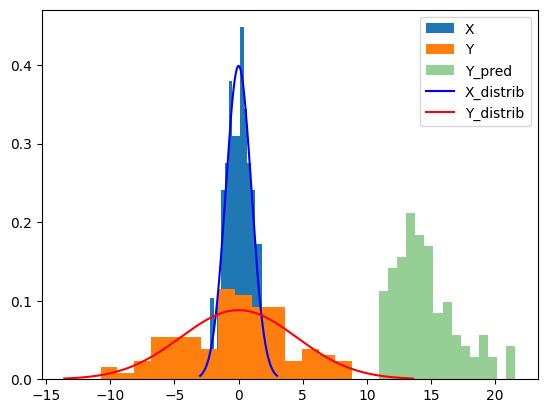

In [23]:
X = dataloader.dataset.X
Y = dataloader.dataset.Y
C = dataloader.dataset.C

test = 21

model_f = ICNNet(input_size = 2, layer_sizes = [input_size,64,64,64,64,output_size], context_layer_sizes=[input_size,64,64,64,64,output_size])
model_f.load_state_dict(torch.load('ICNNf_64*4_uniform_50epochs.pth'))

model_g = ICNNet(input_size = 2, layer_sizes = [output_size,64,64,64,64,input_size], context_layer_sizes=[output_size,64,64,64,64,input_size])
model_g.load_state_dict(torch.load('ICNNg_64*4_uniform_50epochs.pth'))
Y_pred = model_f(X, C)[test, :, 0].detach().numpy()
X_pred = model_g(Y, C)[test, :, 0].detach().numpy()


plt.hist(X[test, :, 0],  bins=15, label = 'X', density = True)
plt.hist(Y[test, :, 0],  bins=15, label = 'Y', density = True)
plt.hist(Y_pred,  bins=15, label = 'Y_pred', density = True, alpha = 0.5)
# plt.hist(X_pred,  bins=15, label = 'X_pred', density = True, alpha = 0.5)
plt.plot(np.linspace(-3, 3, 300), stats.norm.pdf(np.linspace(-3, 3, 300), loc=0, scale=1), label = 'X_distrib', color = 'blue')
plt.plot(np.linspace(-3*scales[test, 0] + locs[test, 0], 3*scales[test, 0] + locs[test, 0], 300), stats.norm.pdf(np.linspace(-3*scales[test, 0] + locs[test, 0], 3*scales[test, 0] + locs[test, 0], 300), loc=locs[test, 0], scale=scales[test, 0]), label = 'Y_distrib', color = 'red')

plt.legend()

plt.show()
         


         



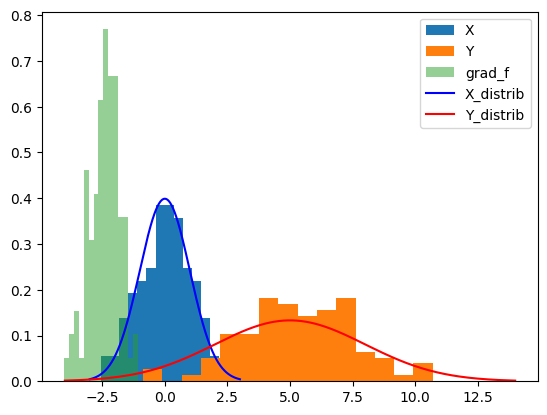

In [25]:
#Calcul de la dérivée du PICNN


test =  27
x_i = X[test, :, :]
c_i = C[test, :, :]


x_i.requires_grad_(True)
c_i.requires_grad_(True)    

output_f = model_f(x_i, c_i)

grad_f = torch.autograd.grad(outputs=output_f, inputs=x_i, grad_outputs=torch.ones_like(output_f), create_graph=True)[0]

plt.hist(X[test, :, 0],  bins=15, label = 'X', density = True)
plt.hist(Y[test, :, 0],  bins=15, label = 'Y', density = True)
plt.hist(grad_f[:, 0].detach().numpy(),  bins=15, label = 'grad_f', density = True, alpha = 0.5)
# plt.hist(X_pred,  bins=15, label = 'X_pred', density = True, alpha = 0.5)
plt.plot(np.linspace(-3, 3, 300), stats.norm.pdf(np.linspace(-3, 3, 300), loc=0, scale=1), label = 'X_distrib', color = 'blue')
plt.plot(np.linspace(-3*scales[test, 0] + locs[test, 0], 3*scales[test, 0] + locs[test, 0], 300), stats.norm.pdf(np.linspace(-3*scales[test, 0] + locs[test, 0], 3*scales[test, 0] + locs[test, 0], 300), loc=locs[test, 0], scale=scales[test, 0]), label = 'Y_distrib', color = 'red')

plt.legend()

plt.show()
